#### Copyright 2019 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License")
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

 https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Tail Latency Lab

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Simulation

#### Poisson Distribution

From raw data
Mean: 19.9227700122
p50: 18.4164832801
p99: 49.1656636327
Ignored: 


<Figure size 1080x216 with 0 Axes>

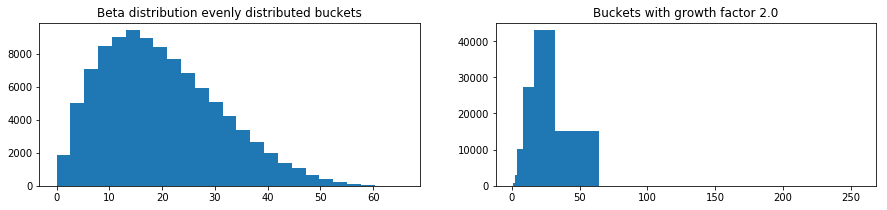

Num buckets: 9
Buckets: [  1   2   4   8  16  32  64 128 256]
Num bucket counts: 8
Count: [8.0500e+02 3.0490e+03 1.0210e+04 2.7381e+04 4.2948e+04 1.5291e+04
 2.0000e+00 0.0000e+00]


In [3]:
def simulate_dist(total, bins, title):
  #raw = np.random.poisson(4, total) * 4.6
  raw = np.random.beta(2, 5, total) * 70
  mean = np.mean(raw, axis=0)
  print("From raw data")
  print("Mean: {}".format(mean))
  p50 = np.percentile(raw, 50)
  print("p50: {}".format(p50))
  fig = plt.figure(figsize=(15, 3))
  p99 = np.percentile(raw, 99)
  print("p99: {}".format(p99))
  fig = plt.figure(figsize=(15, 3))
  ax1 = fig.add_subplot(1, 2, 1)
  ax1.hist(raw, 25)
  ax1.set_title("Beta distribution evenly distributed buckets")
  ax2 = fig.add_subplot(1, 2, 2)
  count, bins, ignored = ax2.hist(raw, bins)
  print("Ignored: ".format(ignored))
  ax2.set_title(title)
  plt.show()
  print("Num buckets: {}".format(len(bins)))
  print("Buckets: {}".format(bins))
  print("Num bucket counts: {}".format(len(count)))
  print("Count: {}".format(count))
  return (count, bins)

index = np.arange(0, 25)
buckets_exp2 = [2**n for n in index]
total = 100000
count, bins = simulate_dist(total, buckets_exp2[:9], "Buckets with growth factor 2.0")

In [4]:
""# Estimate percentiles from for Bucket-based sample
def find_percentile(percentile, ind, ncount, bins, cum_count):
  p = percentile / 100.0
  pVal = bins[ind] + (bins[ind + 1] - bins[ind]) * (p * ncount -
         cum_count[ind - 1]) / (cum_count[ind] - cum_count[ind - 1])
  print("p{0} is in [{1}, {2})".format(percentile, bins[ind], bins[ind + 1]))
  print("p{0}: {1}".format(percentile, pVal))

def estimate_percentiles(count, bins):
  ncounts = np.array(count)
  ncount = np.sum(ncounts)
  print("Sum: {}".format(ncount))
  p50rank = ncount * 0.5
  print("50th percentile rank: {}".format(p50rank))
  p99rank = ncount * 0.99
  print("99th percentile rank: {}".format(p99rank))
  print("Running sum of the buckets:")
  run_count = 0
  cum_count = []
  found_p50 = -1
  found_p99 = -1
  print("Index\tLower\tCummulative")
  for i in range(len(count)):
    run_count += count[i]
    cum_count.append(run_count)
    arrow = ""
    if (found_p50 < 0 and p50rank < run_count):
      found_p50 = i
      arrow = "<== p50"
    if (found_p99 < 0 and p99rank < run_count):
      found_p99 = i
      arrow = "<== p99"
    print("{0}\t{1}\t{2}\t{3}".format(i, bins[i], run_count, arrow))
    arrow = ""
  print("found_p50: {}".format(found_p50))
  print("found_p99: {}".format(found_p99))
  find_percentile(50, found_p50, ncount, bins, cum_count)
  find_percentile(99, found_p99, ncount, bins, cum_count)

estimate_percentiles(count, bins)  

Sum: 99686.0
50th percentile rank: 49843.0
99th percentile rank: 98689.14
Running sum of the buckets:
Index	Lower	Cummulative
0	1	805.0	
1	2	3854.0	
2	4	14064.0	
3	8	41445.0	
4	16	84393.0	<== p50
5	32	99684.0	<== p99
6	64	99686.0	
7	128	99686.0	
found_p50: 4
found_p99: 5
p50 is in [16, 32)
p50: 19.1286206575
p99 is in [32, 64)
p99: 61.9180223661


From raw data
Mean: 19.96034395
p50: 18.5134020228
p99: 49.4526492675
Ignored: 


<Figure size 1080x216 with 0 Axes>

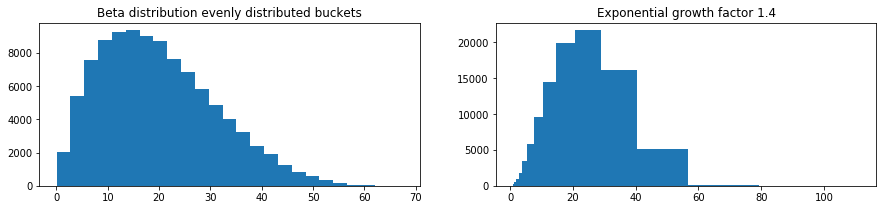

Num buckets: 15
Buckets: [  1.           1.4          1.96         2.744        3.8416
   5.37824      7.529536    10.5413504   14.75789056  20.66104678
  28.9254655   40.4956517   56.69391238  79.37147733 111.12006826]
Num bucket counts: 14
Count: [  284.   478.   977.  1847.  3391.  5856.  9621. 14486. 19844. 21639.
 16079.  5066.   123.     0.]


In [5]:
buckets_exp1_4 = [1.4**n for n in index]
count, bins = simulate_dist(total, buckets_exp1_4[:15], "Exponential growth factor 1.4")

In [6]:
estimate_percentiles(count, bins)

Sum: 99691.0
50th percentile rank: 49845.5
99th percentile rank: 98694.09
Running sum of the buckets:
Index	Lower	Cummulative
0	1.0	284.0	
1	1.4	762.0	
2	1.96	1739.0	
3	2.744	3586.0	
4	3.8416	6977.0	
5	5.37824	12833.0	
6	7.529536	22454.0	
7	10.5413504	36940.0	
8	14.75789056	56784.0	<== p50
9	20.661046784	78423.0	
10	28.9254654976	94502.0	
11	40.4956516966	99568.0	<== p99
12	56.6939123753	99691.0	
13	79.3714773254	99691.0	
found_p50: 8
found_p99: 11
p50 is in [14.75789056, 20.661046784)
p50: 18.5969947048
p99 is in [40.4956516966, 56.6939123753)
p99: 53.8996324721


From raw data
Mean: 19.9109448115
p50: 18.4212345271
p99: 49.4403809279
Ignored: 


<Figure size 1080x216 with 0 Axes>

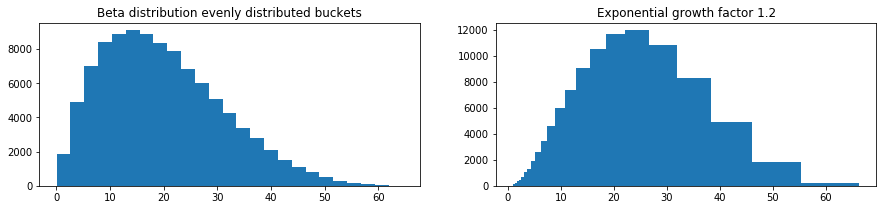

Num buckets: 24
Buckets: [ 1.          1.2         1.44        1.728       2.0736      2.48832
  2.985984    3.5831808   4.29981696  5.15978035  6.19173642  7.43008371
  8.91610045 10.69932054 12.83918465 15.40702157 18.48842589 22.18611107
 26.62333328 31.94799994 38.33759992 46.00511991 55.20614389 66.24737267]
Num bucket counts: 23
Count: [  121.   155.   243.   369.   485.   659.  1030.  1321.  1906.  2602.
  3458.  4590.  6006.  7367.  9038. 10553. 11699. 11960. 10854.  8335.
  4898.  1823.   206.]


In [7]:
buckets_exp1_2 = [1.2**n for n in index]
count, bins = simulate_dist(total, buckets_exp1_2[:24], "Exponential growth factor 1.2")

In [8]:
estimate_percentiles(count, bins)

Sum: 99678.0
50th percentile rank: 49839.0
99th percentile rank: 98681.22
Running sum of the buckets:
Index	Lower	Cummulative
0	1.0	121.0	
1	1.2	276.0	
2	1.44	519.0	
3	1.728	888.0	
4	2.0736	1373.0	
5	2.48832	2032.0	
6	2.985984	3062.0	
7	3.5831808	4383.0	
8	4.29981696	6289.0	
9	5.159780352	8891.0	
10	6.1917364224	12349.0	
11	7.43008370688	16939.0	
12	8.91610044826	22945.0	
13	10.6993205379	30312.0	
14	12.8391846455	39350.0	
15	15.4070215746	49903.0	<== p50
16	18.4884258895	61602.0	
17	22.1861110674	73562.0	
18	26.6233332809	84416.0	
19	31.9479999371	92751.0	
20	38.3375999245	97649.0	
21	46.0051199094	99472.0	<== p99
22	55.2061438912	99678.0	
found_p50: 15
found_p99: 21
p50 is in [15.4070215746, 18.4884258895)
p50: 18.4697383242
p99 is in [46.0051199094, 55.2061438912)
p99: 51.2149284527
